# LV 2.

행렬 테두리 회전하기

https://school.programmers.co.kr/learn/courses/30/lessons/77485

**문제 설명**

    rows x columns 크기인 행렬이 있습니다. 행렬에는 1부터 rows x columns까지의 숫자가 한 줄씩 순서대로 적혀있습니다. 이 행렬에서 직사각형 모양의 범위를 여러 번 선택해, 테두리 부분에 있는 숫자들을 시계방향으로 회전시키려 합니다. 각 회전은 (x1, y1, x2, y2)인 정수 4개로 표현하며, 그 의미는 다음과 같습니다.

    x1 행 y1 열부터 x2 행 y2 열까지의 영역에 해당하는 직사각형에서 테두리에 있는 숫자들을 한 칸씩 시계방향으로 회전합니다.
    다음은 6 x 6 크기 행렬의 예시입니다.
    
    
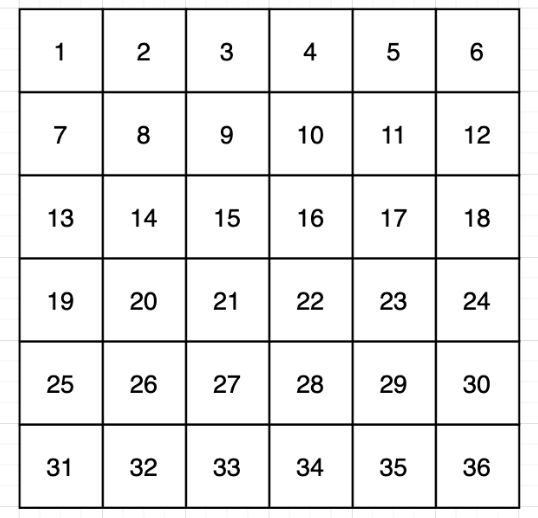

    이 행렬에 (2, 2, 5, 4) 회전을 적용하면, 아래 그림과 같이 2행 2열부터 5행 4열까지 영역의 테두리가 시계방향으로 회전합니다. 이때, 중앙의 15와 21이 있는 영역은 회전하지 않는 것을 주의하세요.
    
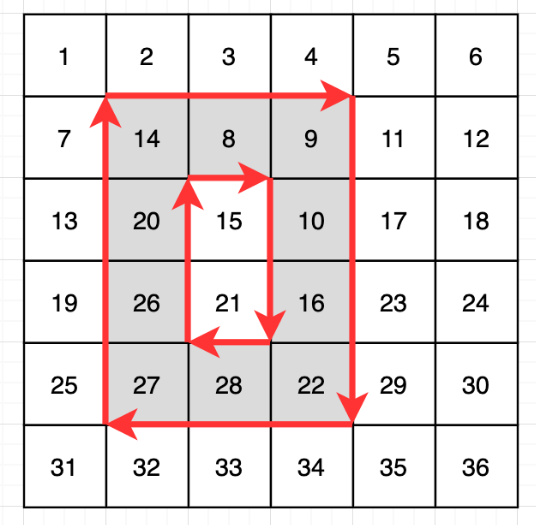  


    행렬의 세로 길이(행 개수) rows, 가로 길이(열 개수) columns, 그리고 회전들의 목록 queries가 주어질 때, 각 회전들을 배열에 적용한 뒤, 그 회전에 의해 위치가 바뀐 숫자들 중 가장 작은 숫자들을 순서대로 배열에 담아 return 하도록 solution 함수를 완성해주세요.


**제한 사항**

    rows는 2 이상 100 이하인 자연수입니다.
    columns는 2 이상 100 이하인 자연수입니다.
    처음에 행렬에는 가로 방향으로 숫자가 1부터 하나씩 증가하면서 적혀있습니다.
    즉, 아무 회전도 하지 않았을 때, i 행 j 열에 있는 숫자는 ((i-1) x columns + j)입니다.
    queries의 행의 개수(회전의 개수)는 1 이상 10,000 이하입니다.
    queries의 각 행은 4개의 정수 [x1, y1, x2, y2]입니다.
    x1 행 y1 열부터 x2 행 y2 열까지 영역의 테두리를 시계방향으로 회전한다는 뜻입니다.
    1 ≤ x1 < x2 ≤ rows, 1 ≤ y1 < y2 ≤ columns입니다.
    모든 회전은 순서대로 이루어집니다.
    예를 들어, 두 번째 회전에 대한 답은 첫 번째 회전을 실행한 다음, 그 상태에서 두 번째 회전을 실행했을 때 이동한 숫자 중 최솟값을 구하면 됩니다.
    
**입출력 예시**

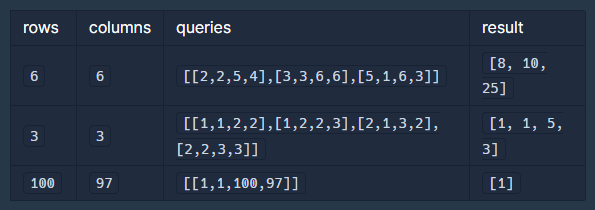

**입출력 예 설명**

    입출력 예 #1
    회전을 수행하는 과정을 그림으로 표현하면 다음과 같습니다.
    
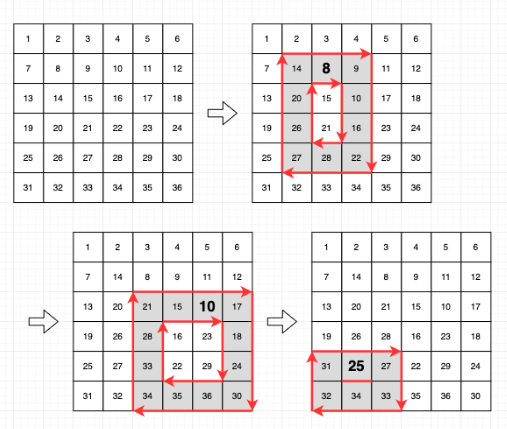


    입출력 예 #2
    회전을 수행하는 과정을 그림으로 표현하면 다음과 같습니다.
    
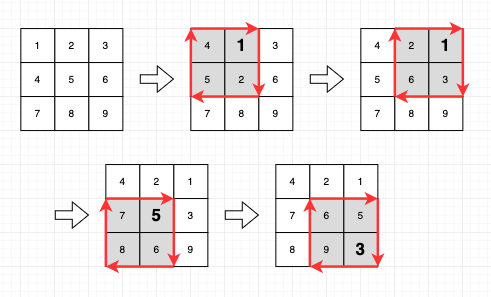

    입출력 예 #3
    이 예시에서는 행렬의 테두리에 위치한 모든 칸들이 움직입니다. 따라서, 행렬의 테두리에 있는 수 중 가장 작은 숫자인 1이 바로 답이 됩니다.

In [53]:
def solution(rows, columns, queries):
    answer = []
    matrix = [[i*columns+j for j in range(1, columns+1)] for i in range(rows)]
    
    for query in queries:
        x1,y1,x2,y2 = query[0]-1, query[1]-1, query[2]-1, query[3]-1
        tmp = matrix[x1][y1]
        min_val = tmp
        
        for i in range(x1,x2):
            matrix[i][y1] = matrix[i+1][y1]
            min_val = min(min_val, matrix[i][y1])
            
        for i in range(y1, y2):
            matrix[x2][i] = matrix[x2][i+1]
            min_val = min(min_val, matrix[x2][i])
            
        for i in range(x2, x1, -1):
            matrix[i][y2]= matrix[i-1][y2]
            min_val = min(min_val, matrix[i][y2])
        
        for i in range(y2, y1, -1):
            matrix[x1][i] = matrix[x1][i-1]
            min_val = min(min_val, matrix[x1][i])
            
        matrix[x1][y1+1] = tmp
        min_val = min(min_val, tmp)
        
        answer.append(min_val)
    
    return answer

In [55]:
print(solution(6,6, [[2,2,5,4],[3,3,6,6],[5,1,6,3]]))
print(solution(3,3, [[1,1,2,2],[1,2,2,3],[2,1,3,2],[2,2,3,3]]))
print(solution(100,97, [[1,1,100,97]]))

[8, 10, 25]
[1, 1, 5, 3]
[1]


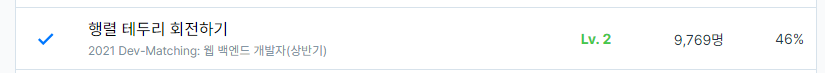

In [56]:
rows, columns, queries = 6,6, [[2,2,5,4],[3,3,6,6],[5,1,6,3]]

answer = []
matrix = [[i*columns+j for j in range(1, columns+1)] for i in range(rows)]

for query in queries:
    x1, y1, x2, y2 = query[0]-1, query[1]-1, query[2]-1, query[3]-1
    tmp = matrix[x1][y1]
    min_val = tmp
    
    for i in range(x1, x2):
        matrix[i][y1] = matrix[i+1][y1]
        min_val = min(min_val, matrix[i][y1])
        
    for i in range(y1, y2):
        matrix[x2][i] = matrix[x2][i+1]
        min_val = min(min_val, matrix[x2][i])
        
    for i in range(x2, x1, -1):
        matrix[i][y2] = matrix[i-1][y2]
        min_val = min(min_val, matrix[i][y2])
    
    for i in range(y2, y1, -1):
        matrix[x2][i] = matrix[x2][i-1]
        min_val = min(min_val, matrix[x2][i])
        
    matrix[x1][y1+1] = tmp
    min_val = min(min_val, tmp)
    
    answer.append(min_val)
    
answer
        
    

[8, 15, 25]

**다른 사람 풀이**

stack을 이용한 새럼 

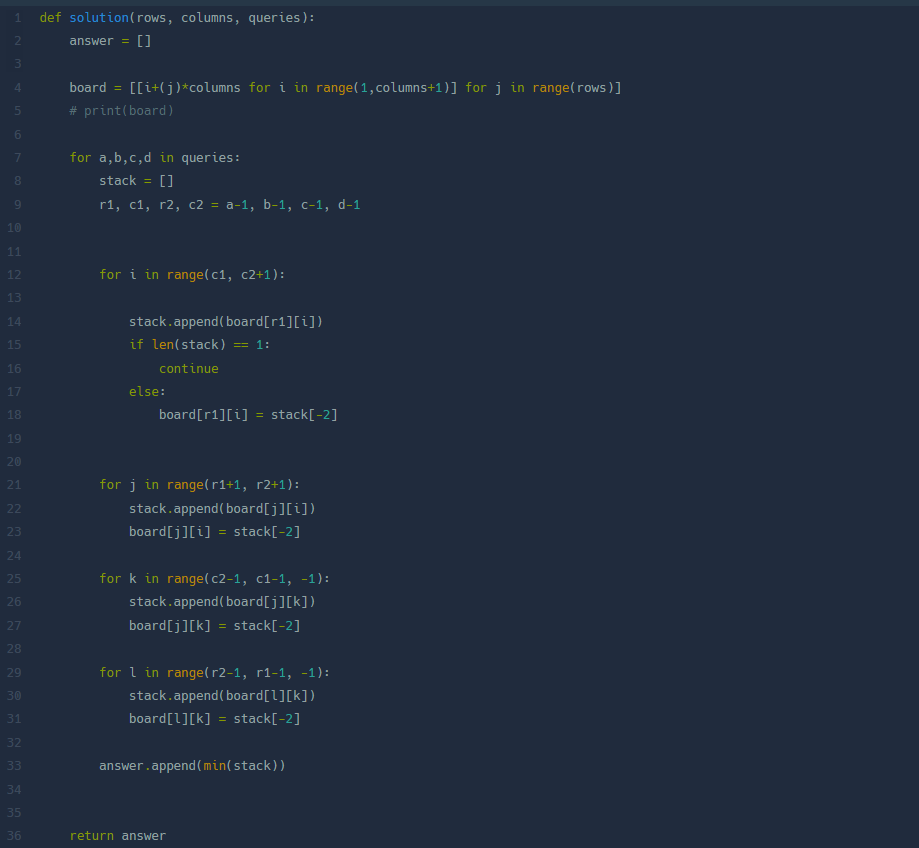

 deque의 rotate 사용
 
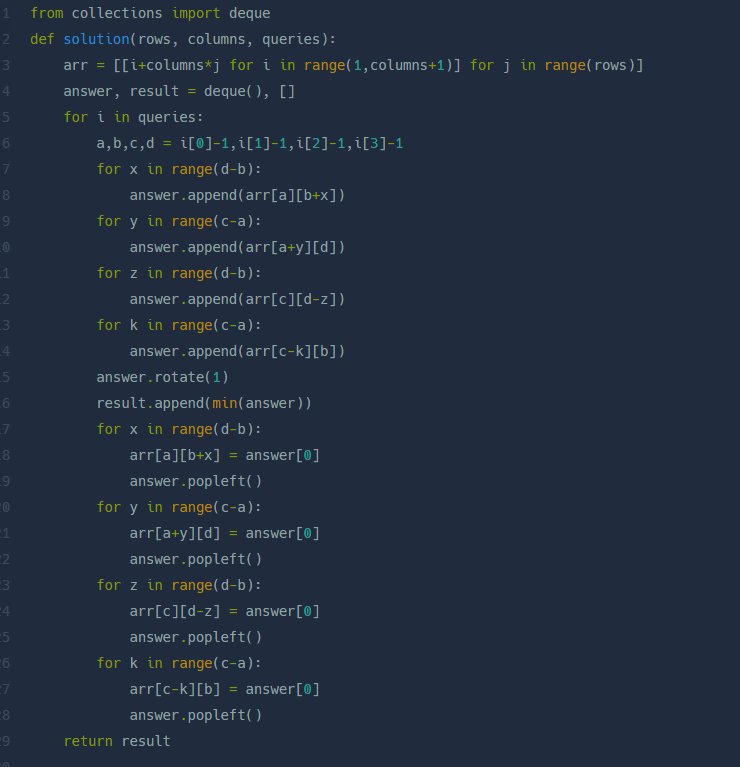